# ORIE 5355/INFO 5370 HW 1: Survey Weighting

 - Name: Kristen Flaherty
 - Net-id: kf293
 - Date: 9-19-2021
 - Late days used for this assignment: 0
 - Total late days used (counting this assignment): 3
 - People with whom you discussed this assignment: Hayden & Heisu

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/spVRAkxcqcDuxkuY6

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2021/assignments/). 

# Conceptual component

### 1) Reading

<font color='blue'> Please read Sections 3 and 4 (pages 6-13) here: https://www.nber.org/system/files/working_papers/w20830/w20830.pdf, and answer the following questions.

<font color='blue'> Please summarize the sections in no more than two sentences. 

eBay's current system of measuring productive seller feedback and seller quality are biased (highly skewed), are generally hard for eBay buyers to interpret, and make it near impossible to accurately tell whether a seller is reliable or not. By creating a new, less biased metric to better capture seller quality that leverages the fact that buyers who had a negative experience with a seller are less likely to leave a negative review, the authors offer an improvement to eBay's reputation feedback system which more accurately quantifies the quality of eBay sellers.

<font color='blue'> Do you think it's a problem that most ratings are positive? If so, why? Answer in no more than three sentences. Please incorporate concepts discussed in class in your answer. 

Yes, it's a problem that most ratings are positive because it makes it harder for buyers to confidently assume that a positively-rated seller is a reliable seller. This problem arises in part because eBay's measurement of seller quality is an example of ambiguous concept-to-measure mapping: the current metric fails to encorporate the numerous and complex factors that influence seller quality/reputation on eBay. The main reason that this inflation of positive ratings is a problem is the high amount of differential nonresponse seen here: the buyers who had negative experiences with eBay sellers are less likley to leave a negative rating about their bad experience, thus inflating the positive ratings that already exist on the seller's profile. 

### 2) Personal reflection

<font color='blue'> Think back to a time that you trained a model on data from people or gathered opinions via a survey (an informal one is fine). If you have not done that before, you may answer these questions about an article in the news that reported on public opinions or a model that you think might be in deployment at a company or organization with which you interact (for example, Amazon, google maps, etc)

<font color='blue'> Briefly summarize the scenario in no more than two sentences. 

In my most recent position, I analyzed transcripts and nonverbal interaction data from a team's problem solving session and used a model to predict their level of attention on the task and on each other.



<font color='blue'> What was the construct that you cared about/wanted to measure? What was the measurement (numerical data)? In what ways did the measurement not match the construct you cared about? Answer in no more than 4 sentences.  

We aimed to measure team engagement at a high level: how much team members cared about the problem solving task at hand and how well they worked together. We measured their attention using computer vision techniques to collect head, body, and eye movements (quantitative data over a certain amount of time), and also asked the teammates to report their level of attention and engagement with each other. The measurement may not have perfectly matched our construct because there is no reliable way to measure attention (even from self disclosure: risk of social desirability). Based on background work, we use attention as a proxy for team engagement, although many factors of individual teammate behavior and overall team dynamics may alter the relationshp between attention and team engagement.

<font color='blue'> What selection biases/differential non-response issues occurred and how did it affect your measurement? (If your answer is "None," explain exactly why you believe the assumptions discussed in class were met). Answer in no more than 3 sentences. 

More often than not, teammates reported that they were attentive and liked working with their teammates. This occured in the context of research, so participants may have wanted to (even unconsciously) appear more socially desirable to the research, and so might have failed to report any negative experiences or inattention they may have had during the problem solving task. This could have positively skewed our results of attention and team engagement, so that we could have not accurately measured team attention and engagement in the broader sense.

<font color='blue'> Given what we have learned in class so far, what would you do differently if faced with the same scenario again? Answer in no more than 3 sentences. 

I would probably disclose to the participants that they should report all feelings (negative, positive, and neutral) in the post task survey, and that their answers will be completely anonymous (even to the research taem) and not shared with anyone else outside of the research team. I would also probably explore different ways to measure team engagement rather than solely on attention and on team member self report.

# Programming component

<font color='blue'> In this part of the homework, we provide you with data from a poll in Florida before the 2016 Presidential election in the United States. We also provide you with (one pollster's) estimates of who will vote in the 2016 election, made before the election. You will use this data and apply the weighting techniques covered in class.

## Preliminaries to load packages and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfpoll = pd.read_csv('polling_data_hw1.csv') # raw polling data
dfpoll

,candidate,age,gender,party,race,education
0,Someone else,30-44,Male,Independent,White,College
1,Hillary Clinton,45-64,Male,Republican,Hispanic,College
2,Hillary Clinton,30-44,Male,Independent,Hispanic,College
3,Hillary Clinton,65+,Female,Democrat,White,College
4,Donald Trump,65+,Female,Republican,White,High School
...,...,...,...,...,...,...
862,Hillary Clinton,65+,Male,Democrat,White,Some College
863,Donald Trump,65+,Male,Independent,White,College
864,Hillary Clinton,18-29,Female,Democrat,Other,College
865,Do not know,45-64,Male,Independent,Refused,Refused


In [3]:
dfdemographic = pd.read_csv('florida_proportions_hw1.csv') # proportions of population
dfdemographic.head(20)

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
0,0.387927,party,NaN,Democrat,NaN
1,0.398788,party,NaN,Republican,NaN
2,0.213285,party,NaN,Independent,NaN
3,0.445928,gender,NaN,Male,NaN
4,0.554072,gender,NaN,Female,NaN
5,0.109728,age,NaN,18-29,NaN
6,0.182219,age,NaN,30-44,NaN
7,0.378175,age,NaN,45-64,NaN
8,0.329879,age,NaN,65+,NaN
9,0.697968,race,NaN,White,NaN


dfdemographic contains estimates of likely voters in Florida in 2016. When Demographic_Type_2 is NaN, the row refers to just the marginal population percentage of the group in Demographic_1 of type Demographic_Type_1. When it is not NaN, the row has the joint distribution of the corresponding demographic groups.

## Part A: Raw visualization

<font color='blue'> Here, we'll visualize whether the respondents in the poll match the likely voter estimates. Create a scatter-plot where each point represents one Demographic group (for example, party-Independent), where the X axis is the Electoral_Proportion in dfdemographic, and the Y axis is the proportion in dfpoll. 

In [4]:
#find the electorial proportions for only the individual demographics in dfdemographics (not joint demographics)
demographic_groups = dfdemographic[dfdemographic['Demographic_Type_2'].isnull()].copy(deep=True)
demographic_groups

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
0,0.387927,party,NaN,Democrat,NaN
1,0.398788,party,NaN,Republican,NaN
2,0.213285,party,NaN,Independent,NaN
3,0.445928,gender,NaN,Male,NaN
4,0.554072,gender,NaN,Female,NaN
5,0.109728,age,NaN,18-29,NaN
6,0.182219,age,NaN,30-44,NaN
7,0.378175,age,NaN,45-64,NaN
8,0.329879,age,NaN,65+,NaN
9,0.697968,race,NaN,White,NaN


In [5]:
#Calculate the proportion of each demographic in dfpoll to match demographic type in dfdemographics.isnull
y = []
#save lables for plots
groups = []
for row in range(demographic_groups.shape[0]):
    #find total count of demographic type, find total count of people, take the proportion
    proportion = (dfpoll[dfpoll[demographic_groups['Demographic_Type_1'][row]] == demographic_groups['Demographic_1'][row]].shape[0])/dfpoll.shape[0]
    groups.append(demographic_groups['Demographic_Type_1'][row]+': \n'+demographic_groups['Demographic_1'][row])
    y.append(proportion)

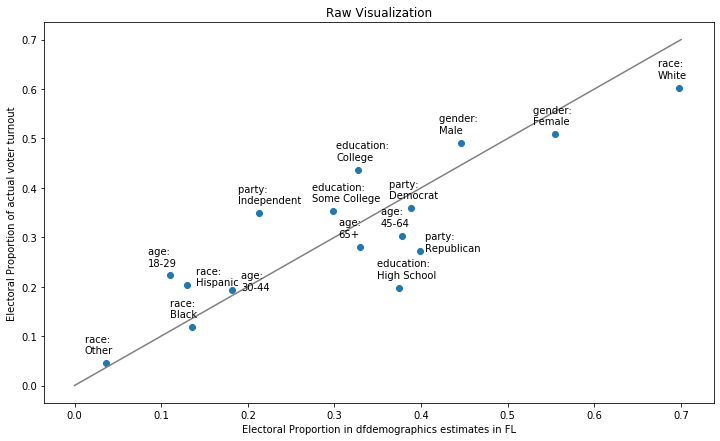

In [173]:
import matplotlib.pyplot as plt

x = demographic_groups['Electoral_Proportion']

plt.figure(figsize=(12,7))
plt.scatter(x, y)
plt.title('Raw Visualization')
plt.xlabel('Electoral Proportion in dfdemographics estimates in FL')
plt.ylabel('Electoral Proportion of actual voter turnout')
plt.plot([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], c='grey') #plot the 'best case scenario' line, if the estimates weren't wrong
for i, label in enumerate(groups): #plot labels and adjust locations to make sure they're readable
    if x[i] == 0.12971895058981098 or x[i] == 0.182218853090832:
        plt.text(x[i]+.01, y[i],label)
    elif x[i] == 0.39878760019453896:
        plt.text(x[i]+.006, y[i],label)
    else:
        plt.text(x[i]-.025, y[i]+.02,label)
        
plt.show()

<font color='blue'>Which group is most over-represented? Most under-represented?</font>

In [7]:
diff = y-x
for i, j in enumerate(diff):
    if j == max(diff):
        for x in range(len(groups)):
            if i == x:
                print('Most-over represented group:', groups[x])

Most-over represented group: party: 
Independent


In [8]:
for i, j in enumerate(diff):
    if j == min(diff):
        for x in range(len(groups)):
            if i == x:
                print('Most under represented group:', groups[x])

Most under represented group: education: 
High School


**Over-represented in FL estimate**: everyone *above* line: Males, college-educated and some-college educated voters, Independent voters, 18-29 aged votes, (slightly) 30-44 aged voters, Hispanic voters, and other race voters

**under-represented in FL estimate**: everyone *below* line: Black voters, aged 65+ voters, aged 45-64 voters, Republican voters, Democratic voters, high school educated voters, female voters, and white voters

## Part B: Weighting

### 1) Raw average

<font color='blue'> For now, we'll ignore people who answered anything but "Hillary Clinton" or "Donald Trump." Below, report the "raw polling average," the percentage of people "Hillary Clinton" divided by the number who answered either Hillary or Trump.

In [9]:
hillary = dfpoll[dfpoll['candidate'] == 'Hillary Clinton'].shape[0]
hillary_trump = dfpoll[(dfpoll['candidate'] == 'Hillary Clinton') | (dfpoll['candidate'] == 'Donald Trump')].shape[0]
raw_poll_avg = 100 * (hillary/hillary_trump)
print('Raw polling average (Hillary Clinton): ', '{:10.5f}'.format(raw_poll_avg), '%')

Raw polling average (Hillary Clinton):    54.58333 %


### 2) Single dimensional marginal weighting (on just 1 demographic type)

<font color='blue'> For each demographic type separately -- age, gender, party, race, and education -- weight the poll by just that demographic type, in accordance to the population proportions given. Report the resulting poll results, and briefly (at most 3 sentences) describe what you observe.

You'll notice that some of the groups in the polling data ("refused") do not show up in the population percentages. For now, we'll ignore those respondents.

In [10]:
#add new columns to capture mean votes for each demographic, and calculate final voting avgs
demographic_groups['Hillary %'] = 0
demographic_groups['Final'] = 0

In [11]:
demographic_groups

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
0,0.387927,party,NaN,Democrat,NaN,0,0
1,0.398788,party,NaN,Republican,NaN,0,0
2,0.213285,party,NaN,Independent,NaN,0,0
3,0.445928,gender,NaN,Male,NaN,0,0
4,0.554072,gender,NaN,Female,NaN,0,0
5,0.109728,age,NaN,18-29,NaN,0,0
6,0.182219,age,NaN,30-44,NaN,0,0
7,0.378175,age,NaN,45-64,NaN,0,0
8,0.329879,age,NaN,65+,NaN,0,0
9,0.697968,race,NaN,White,NaN,0,0


In [12]:
#exclude all votes EXCEPT for hillary and trump; exclude all REFUSED answers in each demographic
dfpoll_test = dfpoll[((dfpoll['candidate']=='Hillary Clinton') | (dfpoll['candidate']=='Donald Trump')) & ((dfpoll['race'] != 'Refused') & (dfpoll['education'] != 'Refused') & (dfpoll['party'] != 'Refused'))].copy(deep=True)

In [13]:
def single_demtype(demtype):
    dems = {}
    #for each demographic type per demographic category
    for idx, dem in enumerate(dfpoll_test.groupby([demtype])['candidate'].value_counts(normalize=True).index.to_list()):
        #if they voted for hillary clinton
        if dem[1] == 'Hillary Clinton':
            #add the voting percent for hillary for this group
            dems[dem[0]] = dfpoll_test.groupby([demtype])['candidate'].value_counts(normalize=True)[idx]
    return dems

In [14]:
def map_singledems():
    singledems = {}
    #find the percent of the vote that was for Hillary for each demographic type witin each demographic category
    for dem in ['party', 'gender', 'age', 'education', 'race']:
        d = single_demtype(dem)
        for i, j in d.items():
            singledems[i] = j
    return singledems

In [15]:
singledems = map_singledems()
singledems

{'Democrat': 0.9381818181818182,
 'Independent': 0.5024154589371981,
 'Republican': 0.07142857142857142,
 'Female': 0.5921787709497207,
 'Male': 0.4940119760479042,
 '18-29': 0.6642857142857143,
 '30-44': 0.5982905982905983,
 '45-64': 0.509009009009009,
 '65+': 0.47417840375586856,
 'College': 0.5478547854785478,
 'High School': 0.528169014084507,
 'Some College': 0.5506072874493927,
 'Black': 0.9375,
 'Hispanic': 0.7714285714285715,
 'Other': 0.6551724137931034,
 'White': 0.39503386004514673}

In [16]:
#for each row in demographic groups
for row in range(demographic_groups.shape[0]):
    #for each demographic and voting percent in the dictionary
    for key, val in singledems.items():
        #find the row where the demographic type resides
        if demographic_groups['Demographic_1'].iloc[row] == key:
            #update the percent of the vote for hillary at this row
            demographic_groups['Hillary %'].loc[row] = val

/Users/kristenflaherty/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
demographic_groups

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
0,0.387927,party,NaN,Democrat,NaN,0.938182,0
1,0.398788,party,NaN,Republican,NaN,0.071429,0
2,0.213285,party,NaN,Independent,NaN,0.502415,0
3,0.445928,gender,NaN,Male,NaN,0.494012,0
4,0.554072,gender,NaN,Female,NaN,0.592179,0
5,0.109728,age,NaN,18-29,NaN,0.664286,0
6,0.182219,age,NaN,30-44,NaN,0.598291,0
7,0.378175,age,NaN,45-64,NaN,0.509009,0
8,0.329879,age,NaN,65+,NaN,0.474178,0
9,0.697968,race,NaN,White,NaN,0.395034,0


In [18]:
#calculate the weighted average per demographic group and store it in the final column
demographic_groups['Final'] = demographic_groups['Electoral_Proportion'] * demographic_groups['Hillary %']

In [19]:
demographic_groups

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
0,0.387927,party,NaN,Democrat,NaN,0.938182,0.363946
1,0.398788,party,NaN,Republican,NaN,0.071429,0.028485
2,0.213285,party,NaN,Independent,NaN,0.502415,0.107158
3,0.445928,gender,NaN,Male,NaN,0.494012,0.220294
4,0.554072,gender,NaN,Female,NaN,0.592179,0.328110
5,0.109728,age,NaN,18-29,NaN,0.664286,0.072890
6,0.182219,age,NaN,30-44,NaN,0.598291,0.109020
7,0.378175,age,NaN,45-64,NaN,0.509009,0.192494
8,0.329879,age,NaN,65+,NaN,0.474178,0.156421
9,0.697968,race,NaN,White,NaN,0.395034,0.275721


In [20]:
final_results = {}
#for each demographic category
for dem in ['party', 'gender', 'age', 'education', 'race']:
    #find the sum of all the demographic types for that one demographic category, store it as a percent
    final_results[dem] = round(100*(demographic_groups[demographic_groups['Demographic_Type_1'] == dem]['Final'].sum()), 3)

In [21]:
#organize final averages
final_df_single = pd.DataFrame.from_dict(final_results, orient='index', columns=['Weighted Poll (% Hillary)'])
final_df_single = final_df_single.reset_index()
final_df_single

,index,Weighted Poll (% Hillary)
0,party,49.959
1,gender,54.840
2,age,53.083
3,education,54.131
4,race,52.699


Observation:

By weighting the polling average by each demographic, the resulting estimate still favors a Hillary Clinton win. Simply weighting the poll by each demographic type must not capture possible  relationships between other existing demographic types or between unmeasured confoundings that might be currently skewing the poll estimates towards Hillary Clinton. 

### 2-dimensional joint distribution weighting

<font color='blue'>Now, for each pair of demographic types in dfdemographic, do the same -- weight the poll by that pair of demographic types, in accordance to the given joint distributions, and briefly (at most 3 sentences) describe what you observe

In [22]:
#take subset of demographic_groups df where only the 2 dimensional proportions exist
demographic_groups2 = dfdemographic[(dfdemographic['Demographic_2'].notnull())].copy(deep=True)

In [23]:
demographic_groups2

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2
16,0.150572,party,gender,Democrat,Male
17,0.237355,party,gender,Democrat,Female
18,0.192204,party,gender,Republican,Male
19,0.206584,party,gender,Republican,Female
20,0.103152,party,gender,Independent,Male
...,...,...,...,...,...
112,0.034216,race,education,Hispanic,Some College
113,0.027588,race,education,Hispanic,College
114,0.010929,race,education,Other,High School
115,0.010570,race,education,Other,Some College


In [24]:
#add new columns to store voting percent and final weighted averages
demographic_groups2['Hillary %'] = 0
demographic_groups2['Final'] = 0

In [25]:
demographic_groups2

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
16,0.150572,party,gender,Democrat,Male,0,0
17,0.237355,party,gender,Democrat,Female,0,0
18,0.192204,party,gender,Republican,Male,0,0
19,0.206584,party,gender,Republican,Female,0,0
20,0.103152,party,gender,Independent,Male,0,0
...,...,...,...,...,...,...,...
112,0.034216,race,education,Hispanic,Some College,0,0
113,0.027588,race,education,Hispanic,College,0,0
114,0.010929,race,education,Other,High School,0,0
115,0.010570,race,education,Other,Some College,0,0


In [26]:
#exclude all votes EXCEPT for hillary and trump; exclude all REFUSED answers in each demographic
dfpoll_test2 = dfpoll[(dfpoll['race']!='Refused') & (dfpoll['party'] != 'Refused') & (dfpoll['education']!='Refused') & ((dfpoll['candidate']=='Hillary Clinton') | (dfpoll['candidate']=='Donald Trump'))]

In [27]:
#find all pairs of demographic types to make it easier to locate them in the dfpoll_test2
pairs = []
for i in demographic_groups2['Demographic_Type_1']:
    for j in demographic_groups2['Demographic_Type_2']:
        if i!= j:
            add = (i, j)
            if add not in pairs and (j, i) not in pairs:
                pairs.append(add)

In [28]:
pairs

[('party', 'gender'),
 ('party', 'age'),
 ('party', 'race'),
 ('party', 'education'),
 ('gender', 'age'),
 ('gender', 'race'),
 ('gender', 'education'),
 ('age', 'race'),
 ('age', 'education'),
 ('race', 'education')]

In [29]:
def double_demtype(demtype1, demtype2):
    
    dems = {}
    #for each demographic type per demographic category
    for idx, dem in enumerate(dfpoll_test2.groupby([demtype1, demtype2])['candidate'].value_counts(normalize=True).index.to_list()):
        #if they voted for hillary clinton
        if dem[2] == 'Hillary Clinton':
            #store the voting percent for the demographic pairs
            dems[(dem[0], dem[1])] = dfpoll_test2.groupby([demtype1, demtype2])['candidate'].value_counts(normalize=True)[idx]
    return dems

In [30]:
doubledems = {}
#find the voting percent for each demographic pair
for pair in pairs:
    d = double_demtype(pair[0], pair[1])
    for i, j in d.items():
        doubledems[i] = j

In [31]:
#for each row in demographic_groups2
for row in range(demographic_groups2.shape[0]):
    #for each pair of voting percents for each pair of demographic types
    for key, val in doubledems.items():
        #find the row that has both demographic types
        if (demographic_groups2['Demographic_1'].iloc[row] == key[0]) and (demographic_groups2['Demographic_2'].iloc[row] == key[1]):
            #store the voting percent in the df
            demographic_groups2['Hillary %'].iloc[row] = val

In [32]:
demographic_groups2

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
16,0.150572,party,gender,Democrat,Male,0.918033,0
17,0.237355,party,gender,Democrat,Female,0.954248,0
18,0.192204,party,gender,Republican,Male,0.070707,0
19,0.206584,party,gender,Republican,Female,0.072072,0
20,0.103152,party,gender,Independent,Male,0.407080,0
...,...,...,...,...,...,...,...
112,0.034216,race,education,Hispanic,Some College,0.734694,0
113,0.027588,race,education,Hispanic,College,0.767857,0
114,0.010929,race,education,Other,High School,0.400000,0
115,0.010570,race,education,Other,Some College,0.800000,0


In [33]:
#multiply the population proportion by the voting percent to get the weighted average for each demographic pair
demographic_groups2['Final'] = demographic_groups2['Electoral_Proportion']*demographic_groups2['Hillary %']

In [34]:
demographic_groups2

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
16,0.150572,party,gender,Democrat,Male,0.918033,0.138230
17,0.237355,party,gender,Democrat,Female,0.954248,0.226496
18,0.192204,party,gender,Republican,Male,0.070707,0.013590
19,0.206584,party,gender,Republican,Female,0.072072,0.014889
20,0.103152,party,gender,Independent,Male,0.407080,0.041991
...,...,...,...,...,...,...,...
112,0.034216,race,education,Hispanic,Some College,0.734694,0.025138
113,0.027588,race,education,Hispanic,College,0.767857,0.021184
114,0.010929,race,education,Other,High School,0.400000,0.004372
115,0.010570,race,education,Other,Some College,0.800000,0.008456


In [35]:
final_results_dub = {}
for dems in pairs:
    #add all of the weighted averages of subcategories to get the final weighted average for demographic pairs
    final_results_dub[dems] = 100*(demographic_groups2[(demographic_groups2['Demographic_Type_1']==dems[0]) & (demographic_groups2['Demographic_Type_2']==dems[1])]['Final'].sum())

In [36]:
#organize the results
final_df_double = pd.DataFrame.from_dict(final_results_dub, orient='index', columns=['Weighted Poll (% Hillary)'])
final_df_double = final_df_double.reset_index()
final_df_double

,index,Weighted Poll (% Hillary)
0,"(party, gender)",50.315066
1,"(party, age)",49.897570
2,"(party, race)",50.140554
3,"(party, education)",49.367935
4,"(gender, age)",53.340309
5,"(gender, race)",53.144842
6,"(gender, education)",54.441858
7,"(age, race)",52.184001
8,"(age, education)",52.578129
9,"(race, education)",50.943755


Observation:

Weighting the polling average by two demographic types at once does not seem to help much with accurately predicting a Trump 2020 win; the weighted polling averages here still, overall, show a Hillary Clinton win. However, some joint distrubtion weighted averages show a more probable Hillary Clinton win than other estimates using other demographic combinations. While weighting the poll doesn't correct the weighted average twoards Trump, these new weighted estimates show new information about which covariates  bolster or lessen the probability of a Trump win.

### 3) 2-dimensional marginal 

<font color='blue'>We don't always have access to joint distributions across the population -- for example, it may be hard to estimate from past exit polls (surveys done as people are leaving the polling station) what the joint distribution of education and gender is, for example. However, access to marginal distributions are often available. 

As discussed in class, one strategy when you don't have access to joint distributions -- only marginals -- is to _multiply_ the marginal distributions. For example, if 50% of your population is Democratic and 50% is a woman, then pretend that 50% times 50% = 25% of your population is a Democratic women. Clearly this technique is not perfect, but it is sometimes a useful heuristic.   

For the following pairs of Demographic types, report the weighting results if you use the joint distributions in dfdemographic versus if you approximate the joint distribution using the marginals. Briefly (at most 3 sentences) describe what you observe.

(party, gender)

<font color='blue'> (race, gender)

<font color='black'> 
Observation:
    
After multiplying the marginal distributions for the two demographic pairs above and using the new joint distribution to find new weighted averages, the new estimates are not any different than the estimates above using the joint distributions given. Below I print the original estimates for these two demographic combinations using the Electoral_Proportion value given in dfdemographic for easy comparison to the weighed average calculated using the new method (multiply marginal distributions).

#### (party, gender)

In [37]:
og_weight_avg = final_results_dub[('party', 'gender')]

In [38]:
demographic_groups

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
0,0.387927,party,NaN,Democrat,NaN,0.938182,0.363946
1,0.398788,party,NaN,Republican,NaN,0.071429,0.028485
2,0.213285,party,NaN,Independent,NaN,0.502415,0.107158
3,0.445928,gender,NaN,Male,NaN,0.494012,0.220294
4,0.554072,gender,NaN,Female,NaN,0.592179,0.328110
5,0.109728,age,NaN,18-29,NaN,0.664286,0.072890
6,0.182219,age,NaN,30-44,NaN,0.598291,0.109020
7,0.378175,age,NaN,45-64,NaN,0.509009,0.192494
8,0.329879,age,NaN,65+,NaN,0.474178,0.156421
9,0.697968,race,NaN,White,NaN,0.395034,0.275721


In [39]:
marginal_ds = {}
dflookup=demographic_groups[(demographic_groups['Demographic_Type_1']=='party') | (demographic_groups['Demographic_Type_1'] == 'gender')]
for row in range(dflookup.shape[0]):
    marginal_ds[dflookup['Demographic_1'].iloc[row]] = dflookup['Electoral_Proportion'].iloc[row]

In [40]:
marginal_ds

{'Democrat': 0.387927360966456,
 'Republican': 0.39878760019453896,
 'Independent': 0.213285038839005,
 'Male': 0.44592792646053503,
 'Female': 0.554072073539465}

In [41]:
dflookup

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
0,0.387927,party,NaN,Democrat,NaN,0.938182,0.363946
1,0.398788,party,NaN,Republican,NaN,0.071429,0.028485
2,0.213285,party,NaN,Independent,NaN,0.502415,0.107158
3,0.445928,gender,NaN,Male,NaN,0.494012,0.220294
4,0.554072,gender,NaN,Female,NaN,0.592179,0.328110


In [42]:
partyd = dict(list(marginal_ds.items())[0:3])
genderd = dict(list(marginal_ds.items())[3:5])

In [43]:
partyd

{'Democrat': 0.387927360966456,
 'Republican': 0.39878760019453896,
 'Independent': 0.213285038839005}

In [44]:
partyd = dict(list(marginal_ds.items())[0:3])
genderd = dict(list(marginal_ds.items())[3:5])

import itertools
permut = itertools.permutations(list(partyd.keys()), len(list(genderd.keys())))
unique_combs = []
for comb in permut:
    zipped = zip(comb, genderd.keys())

    for i in list(zipped):
        if i not in unique_combs:
            unique_combs.append(i)

In [45]:
unique_combs

[('Democrat', 'Male'),
 ('Republican', 'Female'),
 ('Independent', 'Female'),
 ('Republican', 'Male'),
 ('Democrat', 'Female'),
 ('Independent', 'Male')]

In [46]:
marginal_ds_calc = {}
for pair in unique_combs:
#     print(pair[0], marginal_ds[pair[0]])
#     print(pair[1], marginal_ds[pair[1]])
    marginal_ds_calc[pair] = marginal_ds[pair[0]] * marginal_ds[pair[1]]

In [47]:
marginal_ds_calc

{('Democrat', 'Male'): 0.17298764369307923,
 ('Republican', 'Female'): 0.22095707254161534,
 ('Independent', 'Female'): 0.11817528372447281,
 ('Republican', 'Male'): 0.17783052765292362,
 ('Democrat', 'Female'): 0.2149397172733768,
 ('Independent', 'Male'): 0.09510975511453218}

In [48]:
df_double_marginal =demographic_groups2[(demographic_groups2['Demographic_Type_1']=='party') & (demographic_groups2['Demographic_Type_2']=='gender')].copy(deep=True)
df_double_marginal
#replace electoral pro with new marginal calculations, and multiply again by hillary %

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
16,0.150572,party,gender,Democrat,Male,0.918033,0.138230
17,0.237355,party,gender,Democrat,Female,0.954248,0.226496
18,0.192204,party,gender,Republican,Male,0.070707,0.013590
19,0.206584,party,gender,Republican,Female,0.072072,0.014889
20,0.103152,party,gender,Independent,Male,0.407080,0.041991
21,0.110133,party,gender,Independent,Female,0.617021,0.067955


In [49]:
#update new joint distributions in the df
for row in range(df_double_marginal.shape[0]):
    for key, val in marginal_ds_calc.items():
        if (df_double_marginal['Demographic_1'].iloc[row] == key[0]) and (df_double_marginal['Demographic_2'].iloc[row] == key[1]):
            df_double_marginal['Electoral_Proportion'].iloc[row] = val

In [50]:
df_double_marginal

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
16,0.172988,party,gender,Democrat,Male,0.918033,0.138230
17,0.214940,party,gender,Democrat,Female,0.954248,0.226496
18,0.177831,party,gender,Republican,Male,0.070707,0.013590
19,0.220957,party,gender,Republican,Female,0.072072,0.014889
20,0.095110,party,gender,Independent,Male,0.407080,0.041991
21,0.118175,party,gender,Independent,Female,0.617021,0.067955


In [51]:
#multiply voting percent and new joint population proportion to get weighted avergae for each pair
df_double_marginal['Final'] = df_double_marginal['Electoral_Proportion']*df_double_marginal['Hillary %']

In [52]:
df_double_marginal

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
16,0.172988,party,gender,Democrat,Male,0.918033,0.158808
17,0.214940,party,gender,Democrat,Female,0.954248,0.205106
18,0.177831,party,gender,Republican,Male,0.070707,0.012574
19,0.220957,party,gender,Republican,Female,0.072072,0.015925
20,0.095110,party,gender,Independent,Male,0.407080,0.038717
21,0.118175,party,gender,Independent,Female,0.617021,0.072917


In [53]:
partygender_avg = 100*(round(df_double_marginal['Final'].sum(), 6))

In [54]:
print('Weighted polling averag by party x gender 2-D marginal (mulitplying distributions) = ', partygender_avg, '%')
print('Weighted polling averag by party x gender 2-D marginal (pre given joint distributions) = ', final_df_double[final_df_double['index'] == ('party', 'gender')]['Weighted Poll (% Hillary)'][0], '%')

Weighted polling averag by party x gender 2-D marginal (mulitplying distributions) =  50.404700000000005 %
Weighted polling averag by party x gender 2-D marginal (pre given joint distributions) =  50.31506599886879 %


#### (race, gender)

In [55]:
og2_weight_avg = final_results_dub[('gender', 'race')]

In [56]:
df_lookup = demographic_groups[(demographic_groups['Demographic_Type_1']=='race') | (demographic_groups['Demographic_Type_1'] == 'gender')].copy(deep=True)

In [57]:
df_lookup

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
3,0.445928,gender,NaN,Male,NaN,0.494012,0.220294
4,0.554072,gender,NaN,Female,NaN,0.592179,0.328110
9,0.697968,race,NaN,White,NaN,0.395034,0.275721
10,0.135672,race,NaN,Black,NaN,0.937500,0.127192
11,0.129719,race,NaN,Hispanic,NaN,0.771429,0.100069
12,0.036641,race,NaN,Other,NaN,0.655172,0.024006


In [58]:
marginal_ds2 = {}
#create dictionary
for row in range(df_lookup.shape[0]):
    marginal_ds2[df_lookup['Demographic_1'].iloc[row]] = df_lookup['Electoral_Proportion'].iloc[row]

In [59]:
marginal_ds2

{'Male': 0.44592792646053503,
 'Female': 0.554072073539465,
 'White': 0.6979683793604979,
 'Black': 0.13567183678900302,
 'Hispanic': 0.12971895058981098,
 'Other': 0.036640833260687004}

In [60]:
gendered2 = dict(list(marginal_ds2.items())[0:2])
race = dict(list(marginal_ds2.items())[2:6])

In [61]:
import itertools
permut2 = itertools.permutations(list(race.keys()), len(list(gendered2.keys())))
unique_combs = []
for comb in permut2:
    zipped = zip(comb, gendered2.keys())
    for i in list(zipped):
        if i not in unique_combs:
            unique_combs.append(i)


In [62]:
unique_combs

[('White', 'Male'),
 ('Black', 'Female'),
 ('Hispanic', 'Female'),
 ('Other', 'Female'),
 ('Black', 'Male'),
 ('White', 'Female'),
 ('Hispanic', 'Male'),
 ('Other', 'Male')]

In [63]:
marginal_ds2_calc = {}
for pair in unique_combs:
#     print(pair[0], marginal_ds2[pair[0]])
#     print(pair[1], marginal_ds2[pair[1]])
    marginal_ds2_calc[pair] = marginal_ds2[pair[0]] * marginal_ds2[pair[1]]

In [64]:
marginal_ds2_calc

{('White', 'Male'): 0.3112435921432469,
 ('Black', 'Female'): 0.07517197593059077,
 ('Hispanic', 'Female'): 0.07187364793065996,
 ('Other', 'Female'): 0.020301662460962645,
 ('Black', 'Male'): 0.06049986085841225,
 ('White', 'Female'): 0.386724787217251,
 ('Hispanic', 'Male'): 0.057845302659151006,
 ('Other', 'Male'): 0.01633917079972436}

In [65]:
# df_double_marginal2 =df_double[(df_double['Dem Cat 1']=='gender') & (df_double['Dem Cat 2']=='race')].copy(deep=True)
# df_double_marginal2

df_double_marginal2 =demographic_groups2[(demographic_groups2['Demographic_Type_1']=='gender') & (demographic_groups2['Demographic_Type_2']=='race')].copy(deep=True)
df_double_marginal2
#replace electoral pro with new marginal calculations, and multiply again by hillary %

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
63,0.322556,gender,race,Male,White,0.323383,0.104309
64,0.051276,gender,race,Male,Black,0.878049,0.045022
65,0.055765,gender,race,Male,Hispanic,0.696203,0.038824
66,0.016331,gender,race,Male,Other,0.692308,0.011306
67,0.375412,gender,race,Female,White,0.454545,0.170642
68,0.084396,gender,race,Female,Black,1.000000,0.084396
69,0.073954,gender,race,Female,Hispanic,0.868852,0.064255
70,0.020309,gender,race,Female,Other,0.625000,0.012693


In [66]:
for row in range(df_double_marginal2.shape[0]):
    for key, val in marginal_ds2_calc.items():
        if (df_double_marginal2['Demographic_1'].iloc[row] == key[1]) and (df_double_marginal2['Demographic_2'].iloc[row] == key[0]):
            df_double_marginal2['Electoral_Proportion'].iloc[row] = val

In [67]:
df_double_marginal2

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
63,0.311244,gender,race,Male,White,0.323383,0.104309
64,0.060500,gender,race,Male,Black,0.878049,0.045022
65,0.057845,gender,race,Male,Hispanic,0.696203,0.038824
66,0.016339,gender,race,Male,Other,0.692308,0.011306
67,0.386725,gender,race,Female,White,0.454545,0.170642
68,0.075172,gender,race,Female,Black,1.000000,0.084396
69,0.071874,gender,race,Female,Hispanic,0.868852,0.064255
70,0.020302,gender,race,Female,Other,0.625000,0.012693


In [68]:
#multiply voting percent for each pair of demographics by new joint pop proprtion to get weighted average
df_double_marginal2['Final'] = df_double_marginal2['Electoral_Proportion']*df_double_marginal2['Hillary %']

In [69]:
df_double_marginal2

,Electoral_Proportion,Demographic_Type_1,Demographic_Type_2,Demographic_1,Demographic_2,Hillary %,Final
63,0.311244,gender,race,Male,White,0.323383,0.100651
64,0.060500,gender,race,Male,Black,0.878049,0.053122
65,0.057845,gender,race,Male,Hispanic,0.696203,0.040272
66,0.016339,gender,race,Male,Other,0.692308,0.011312
67,0.386725,gender,race,Female,White,0.454545,0.175784
68,0.075172,gender,race,Female,Black,1.000000,0.075172
69,0.071874,gender,race,Female,Hispanic,0.868852,0.062448
70,0.020302,gender,race,Female,Other,0.625000,0.012689


In [70]:
racegender_avg = round(100*df_double_marginal2['Final'].sum(), 4)

In [71]:
print('Weighted polling averag by race x gender 2-D marginal (mulitplying distributions) = ', racegender_avg, '%')
print('Weighted polling averag by race x gender 2-D marginal (pre given joint distributions) = ', round(final_df_double[final_df_double['index'] == ('gender', 'race')]['Weighted Poll (% Hillary)'][5],4), '%')

Weighted polling averag by race x gender 2-D marginal (mulitplying distributions) =  53.1449 %
Weighted polling averag by race x gender 2-D marginal (pre given joint distributions) =  53.1448 %


### 4) Bonus points (up to 6 points): Implement a "cheap" version of the MRP technique mentioned in class.

<font color='blue'> The above techniques use the mean answer among people who share a demographic as the estimate for that demographic. But that wastes information _across_ demographics. For example, maybe people who only have "Some College" are similar enough to people who have "High School" as to provide some useful information. 

First, do the following: use a logistic regression (or your favorite prediction tool) to predict candidate choice, using the demographics. You might want to convert some demographics (like education) to ordered numeric (e.g., 1, 2, 3) as opposed to using discrete categories. 

Here, you will earn partial bonus points by just reporting the predictions and comparing them to the means of each covariate group in the raw polling data. Give a scatter-plot, where each point is one combination of full demographics (age, gender, party, race/ethnicity, education), the X axis is the raw polling average for that combination, and the Y axis is your regression prediction for that combination.   

Then, once you have predictions for each set of covariates, "post-stratify" to get a single population estimate by plugging them into the above weighting techniques, where you use the predictions instead of the raw averages in that cell. Report the resulting estimates if you do the 2-dimensional joint weighting (on every pair).



creates a line to fit dfpoll: aiming to look at new parameters calculatated from log regression

In [72]:
#log regression; convert demographic categories to ordinal (0 to X)

In [73]:
#scatter plot: datapt = combo of different demographics, x = polling avg prediction, y = hillary or clinton?

In [74]:
#post stratify? to get one population estimate using weighting techniques using predicted averages (NOT raw avgs)
#report estimates for every pair of demographics

### 5) Bonus points (up to 3 points): Implement full "raking" using all the demographic covariates, i.e., match all the marginals without assuming independence, as opposed to just one or two marginal distributions.

<font color='blue'> You may use existing python packages, such as [here](https://quantipy.readthedocs.io/en/staging-develop/sites/lib_doc/weights/01_background.html#the-statistical-problem). Another approach would be to use [rpy2](https://rpy2.github.io/doc/latest/html/introduction.html) to call `R`, as there are many well-maintained packages in `R` to analyze polling data. One example is [here](https://www.rdocumentation.org/packages/survey/versions/4.1-1/topics/rake). 

## Part C: Uncertainty analysis and choices

### 1) Education weighting analysis and "refused" answers

<font color='blue'> i. In Part B, you should notice a discrepancy from what we said in class and the data -- weighting by education does _not_ seem to help much in reducing the polling average from being pro-Clinton. Dig into the data to see why the methods we tried above might not be perfect, and what data you would want (such as demographic joint distribution) to do better. Discuss in 5 sentences or less. Especially convincing would be plots/calculations on what would happen under hypothetical data. 

Hint: Look at polling average broken up by just education, and then broken up by education and other covariates. Especially helpful may be the following pandas command:

`dfpoll.groupby(['education', ...])['candidate'].value_counts(normalize = True)`

where ... is replaced by other columns


<font color='black'> The methods we tried might not be perfect because we are overlooking important discrepancies in our dataset, especially related to the votes of those who are listed as Refused in party, race, and education demographics. These voters are less likely to vote for Hillary, more likely to vote for Trump, but most likely to vote for neither Trump or Hillary. This important fact is currently unaccounted for in our methods and should be accounted for in order to capture the true weighted polling averages across party, race and education. For a large portion of these demographic groups, the polling results we used in our methods to estimate final polling averages only comes from a select group of voter types; we are missing data that should be included to account for the uncertainty that is being ignored in our methods right now. We can focus particularly on those voters who reported Refused for party, race and gender categories- or those who voted 'do not know' or 'someone else' as candidate- to run a logistic regression model and try to use other features of the voter (location, employment type, etc.) to predict who they will vote for, even if they reported that they do not know themselves. This could help us quantify our uncertainty in a loose way, and then we can then incorporate it into our methods to try to accurately predict final polling average. Having data that is more representative of our true population would help our estimates be more accurate.

In [118]:
print('The demographics below all have a "Refused" category:')
for i in ['party', 'race', 'gender', 'education']:
    for j in dfpoll[i].unique():
        if j == 'Refused':
            print(i)

The demographics below all have a "Refused" category:
party
race
education


First, I check to see the distribution of votes of people who went to college:

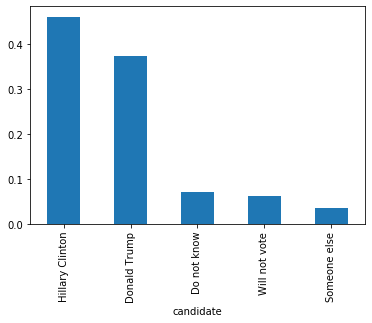

In [110]:
dfpoll.groupby(['education'])['candidate'].value_counts(normalize=True)['College'].plot(x='X',kind='bar')

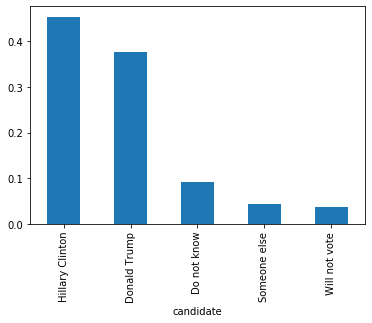

In [111]:
dfpoll.groupby(['education'])['candidate'].value_counts(normalize=True)['Some College'].plot(x='X',kind='bar')

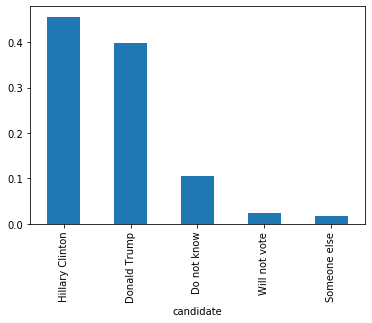

In [112]:
dfpoll.groupby(['education'])['candidate'].value_counts(normalize=True)['High School'].plot(x='X',kind='bar')

Clinton is the highest voted for candidate out of all education types. Next, I explore the distribution of votes for those who Refused to report education:

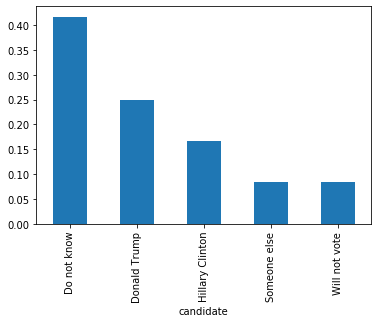

In [120]:
dfpoll.groupby(['education'])['candidate'].value_counts(normalize=True)['Refused'].plot(x='X',kind='bar')

From the plot above we can see that most voters who listed Refused as their education type did not know who to vote for, and voted more for Trump than for Hillary. This shows us that there are confounds in our dataset that will affect the relationship of education and polling result and that might be currently overlooked in our methods throughout this homework (above).

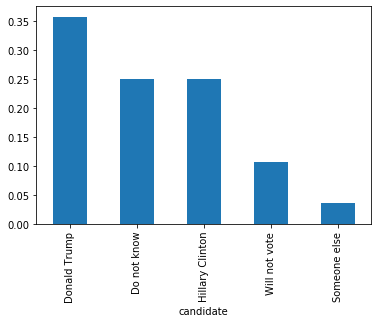

In [122]:
dfpoll.groupby(['race'])['candidate'].value_counts(normalize=True)['Refused'].plot(x='X',kind='bar')

Most voters who have Refused as their recorded race voted for either Trump or neither candidate before voting for Hillary. This follows what we observe above when breaking down voting results within different education types.

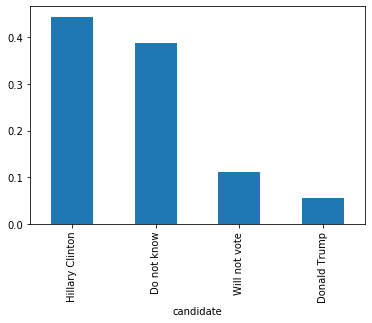

In [123]:
dfpoll.groupby(['party'])['candidate'].value_counts(normalize=True)['Refused'].plot(x='X',kind='bar')

Voters who have Refused as their party are more likely to vote for either Hillary or neither of the candidates (or not vote at all) before voting for Trump. This differs from what we observed in the above plots showing that most voters with Refused as their race or education are more likely to vote for Trump. 

Look at polling average broken up by just education, and then broken up by education and other covariates.

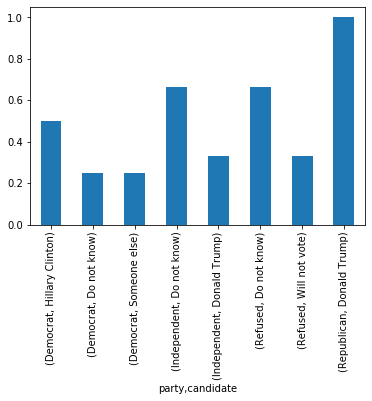

In [127]:
dfpoll.groupby(['education', 'party'])['candidate'].value_counts(normalize=True)['Refused'].plot(x='X',kind='bar')

When breaking down the poll by education and party focusing only on those who have Refused listed as their education, we see that the only loyal Clinton candidates are the Democrats, while other Independent and Refused voters, who could have voted for Hillary, either voted for Trump or did not know who to vote for -- before they even considered not voting for Hillary. This shows that Trump has more support.

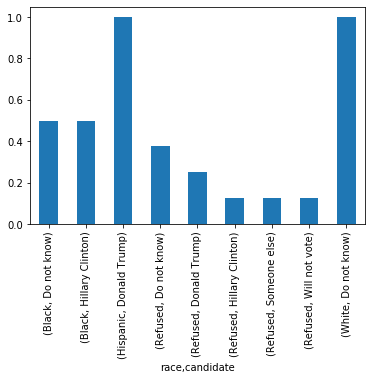

In [133]:
dfpoll.groupby(['education', 'race'])['candidate'].value_counts(normalize=True)['Refused'].plot(x='X',kind='bar')

Most hispanic and white voters who refused to report their education appear most likely to vote for trump, while black voters who refused to report their education and other voters who refused to report their race as well were more likely to not know whow to vote for. This shows clear ambiguity in teh data, where the uncertainty of the voter yields uncertainty in polling estimes.

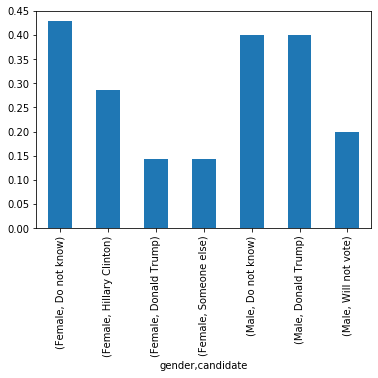

In [129]:
dfpoll.groupby(['education', 'gender'])['candidate'].value_counts(normalize=True)['Refused'].plot(x='X',kind='bar')

Most men and women who reported Refused as their education were more likly to vote for Trump or to not know who to vote for. It seems here that Trump has more support in this group overall than Hillary. 

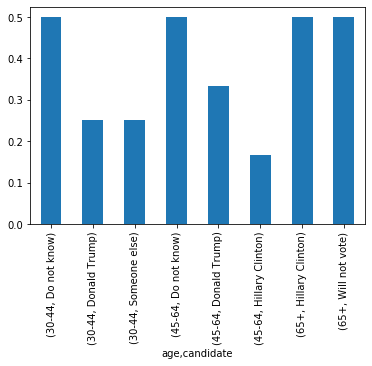

In [130]:
dfpoll.groupby(['education', 'age'])['candidate'].value_counts(normalize=True)['Refused'].plot(x='X',kind='bar')

For those who reported Refused as their education, a majority reported over all age groups reported that either they do not know who to vote for or they will note vote. Donald Trump seems to be the favored candidate after the uncertain voters, and Hillary clinton is favored in the older population. This plot clearly shows that the polling results used in our methods in Part B only come from 4 out of the 8 columns in this plot -- we are missing data and failing to account for the other valuable half of this data by leaving out Refused voters.

<font color='blue'> ii. You'll notice that there are many responses with "refused," and that those people in particular are Trump-leaning. The weighting techniques we used above would ignore these people. How would you adjust your procedures/estimates above to take them into account? Especially convincing would be plots/calculations on what would happen under hypothetical data. Answer in at most 3 sentences.

You can run a logistic regression for each demographic type that is reported as refused, using other features that exclude the refused category, in order to predict which candidate they are likely to vote for and encorporate that prediction into the final polling average. Similarly, you can weight each refused category by the polling percent within all of the refused and multiply it by refused group's population proportion in dfpoll to include the refused responses in the final polling estimate, but it would probably be best to do 2-dimensional marginal distribution weighting in order to account for discrepancies plotted above.

<font color='blue'> None of the above techniques deal with selection biases/non-response on _un-measured_ covariates. Do you think that may be an important concern in this dataset? Why or why not? Respond in 3 or fewer sentences.

Yes, I think the voters who said 'do not now' or 'will not vote' show that this is a concern in this dataset. These voters likely represent the population of 'Shy Trumpe voters' who voted during the 2020 election but failed to report their Trump votes in earlier polls. There are other variables that affect whether a voter reports their vote in a poll or in an actual election, such as social network influence in a given area, and this is important to measure especially in polling data within one location (Florida in this dataset).

### 2) Final estimates

<font color='blue'> Throughout this homework, you made many estimates of the same quantity -- the fraction of people who will vote for Clinton in Florida. Below, plot a histogram of all your estimates.

In [172]:
import matplotlib.pyplot as plt

estimates = [racegender_avg, partygender_avg]

for i in final_df_double['Weighted Poll (% Hillary)']:
    estimates.append(i)

for i in final_df_single['Weighted Poll (% Hillary)']:
    estimates.append(i)

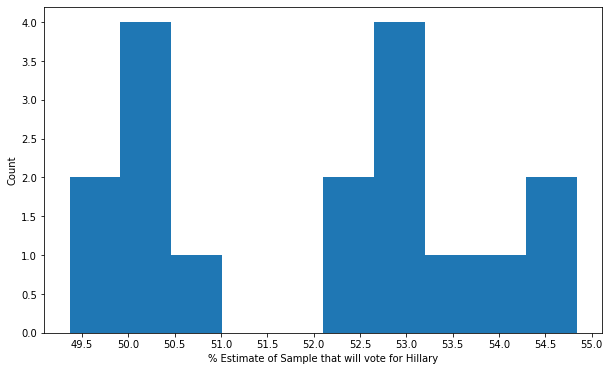

In [125]:
plt.figure(figsize=(10, 6))

plt.hist(estimates)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('% Estimate of Sample that will vote for Hillary')
plt.ylabel('Count')

plt.show()

<font color='blue'> Given all your above analysis, if you were a pollster what would you report as your single estimate? 

In [126]:
import numpy as np
single_est=round(np.median(estimates), 4)
print(single_est, '%')

52.5781 %


<font color='blue'> Justify your choice, in at most 3 sentences

The median is considered the best measure of central tendency because it is 'it is unaffected by extreme outliers or non-symmetric distributions of scores' (source linked below). Additionally, most of the estimates favored Hillary to win, which isn't accurate in retrospect, but those are what the data shows after our weighting techniques. I do believe that better weighting techniques will yield a better single estimate.

https://www.scribbr.com/statistics/central-tendency/#:~:text=For%20normally%20distributed%20data%2C%20all,non%2Dsymmetric%20distributions%20of%20scores.

<font color='blue'> Though we did not discuss how to calculate margin of error or standard errors with weighting in this course, what would you say if someone asked you how confident you are in your estimate? You may either qualitatively answer, or try to come up with a margin of error.  

I would say that I'm not fully confident in my final estimate. I say this because I don't have real polling data from the 2020 election in this section of Florida so I can't calculate the accuracy of our weighting methods. Doing this comparison between estimates and real averages would check how far off our polling estimates were, but also give us a metric for how representative our sample is from the actual population distribution. Although this isn't possible in a real polling estimation case, there will always be uncertainty any time you are trying to predict some outcome. One major reason I don't have much confidence in our polling estimate is because of the amount of uncertainty injected through the refused answers and 'do not know' or 'will not vote' answers. If we find a way to measure and minimize this  uncertainty of answers within the dataset, then we can better estimate the final polling average and minimize our overall uncertainty after weighted averaging calculations.